Visualizing my step data, from a Garmin [vívofit](https://buy.garmin.com/en-US/US/p/143405) (until about May 2016) and [Forerunner 235](https://buy.garmin.com/en-US/US/p/529988) (since about then).
The data has been recorded to the [Apples Health](https://www.apple.com/ios/health/) app by [Garmin Connect](https://connect.garmin.com/).
I exported the data from Apple Health to a [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) file with the [QS Access](http://quantifiedself.com/qs-access-app/) app.

In [1]:
# Load some modules we need
import pandas  # for data manipulation
import matplotlib.pylab as plt  # for plotting
%matplotlib inline
import seaborn  # for plot styling
import dateutil.relativedelta  # for date calculations
import calendar  # for easy day and month names in the tick labels

In [2]:
# Set some defaults
seaborn.set_style('dark')
plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit

In [3]:
# Read in data
data = pandas.read_csv('steps.csv')

In [4]:
# How does it look like?
data.head()

,Start,Finish,Steps (count)
0,13-Sep-2014 00:00,14-Sep-2014 00:00,13132.0
1,14-Sep-2014 00:00,15-Sep-2014 00:00,23778.0
2,15-Sep-2014 00:00,16-Sep-2014 00:00,9459.0
3,16-Sep-2014 00:00,17-Sep-2014 00:00,12109.0
4,17-Sep-2014 00:00,18-Sep-2014 00:00,11904.0


In [5]:
# Massage data
data.rename(columns={'Start': 'Date'}, inplace=True)
data.rename(columns={'Steps (count)': 'Steps'}, inplace=True)
data.Steps = data.Steps.astype(int)
data.drop('Finish', axis=1, inplace=True)

In [6]:
# How doed it look now?
data.head()

,Date,Steps
0,13-Sep-2014 00:00,13132
1,14-Sep-2014 00:00,23778
2,15-Sep-2014 00:00,9459
3,16-Sep-2014 00:00,12109
4,17-Sep-2014 00:00,11904


In [7]:
# Make us a proper date column, based on https://stackoverflow.com/a/26763793
data['Date'] = pandas.to_datetime(data['Date'])

In [8]:
# Make us a year, month and weekday colum, based on https://stackoverflow.com/q/48623332
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data['Weekday'] = data.Date.dt.dayofweek

In [9]:
# How doed it look now?
data.head()

,Date,Steps,Year,Month,Day,Weekday
0,2014-09-13,13132,2014,9,13,5
1,2014-09-14,23778,2014,9,14,6
2,2014-09-15,9459,2014,9,15,0
3,2014-09-16,12109,2014,9,16,1
4,2014-09-17,11904,2014,9,17,2


In [10]:
yearwelookat = 2018

In [11]:
# Give out totals to see if we have approximately the same as shown in Garmin Connect
print('In %s I made a total of %0.2f Million steps' % (yearwelookat,
                                                       data[(data.Year == yearwelookat)]['Steps'].sum() * 1e-6))

In 2018 I made a total of 3.85 Million steps


In [12]:
# Give out totals to see if we have approximately the same as shown in Garmin Connect
for month in sorted(data.Date.dt.month.unique()):
    print('In %s %s I made a total of %s steps' % (calendar.month_name[month],
                                                   yearwelookat,
                                                   data[(data.Year == yearwelookat) &
                                                        (data.Month == month)]['Steps'].sum()))

In January 2018 I made a total of 312589 steps
In February 2018 I made a total of 287856 steps
In March 2018 I made a total of 336025 steps
In April 2018 I made a total of 413156 steps
In May 2018 I made a total of 367133 steps
In June 2018 I made a total of 305776 steps
In July 2018 I made a total of 315773 steps
In August 2018 I made a total of 324662 steps
In September 2018 I made a total of 319794 steps
In October 2018 I made a total of 299764 steps
In November 2018 I made a total of 259320 steps
In December 2018 I made a total of 311852 steps


In [13]:
# When were the five highest step counts?
data[data.Year == yearwelookat].sort_values('Steps', ascending=False).head()

,Date,Steps,Year,Month,Day,Weekday
1446,2018-08-29,21465,2018,8,29,2
1323,2018-04-28,20878,2018,4,28,5
1492,2018-10-14,20211,2018,10,14,6
1309,2018-04-14,19808,2018,4,14,5
1302,2018-04-07,19788,2018,4,7,5


In [14]:
# When were the five lowest step counts?
data[data.Year == yearwelookat].sort_values('Steps').head()

,Date,Steps,Year,Month,Day,Weekday
1391,2018-07-05,303,2018,7,5,3
1479,2018-10-01,3072,2018,10,1,0
1465,2018-09-17,4346,2018,9,17,0
1558,2018-12-19,4359,2018,12,19,2
1505,2018-10-27,4659,2018,10,27,5


In [15]:
# Generate us a nice plot title, with help from https://stackoverflow.com/a/32083946/323100
Duration = dateutil.relativedelta.relativedelta(data[data.Year == yearwelookat].Date.max(),
                                                data[data.Year == yearwelookat].Date.min())

In [16]:
# Generate us some nice tick labels
Ticklabels_weekday = ['%s\n~%g steps' % (d, round(s / 1e3, 1) * 1e3)
                      for (s, d) in zip(data[data.Year == yearwelookat].groupby('Weekday').Steps.mean(),
                                        list(calendar.day_name))]
# Generate us some nice tick labels
Ticklabels_month = ['%s\n~%g steps' % (m, round(s / 1e3, 1) * 1e3)
                    for (s, m) in zip(data[data.Year == yearwelookat].groupby('Month').Steps.mean(),
                                      list(calendar.month_name[1:]))]
# Generate us some nice tick labels
Ticklabels_year = ['%s\n~%g steps' % (y, round(s / 1e3, 1) * 1e3)
                   for (s, y) in zip(data[data.Year == yearwelookat].groupby('Year').Steps.mean(),
                                     data[data.Year == yearwelookat].Year.unique())]

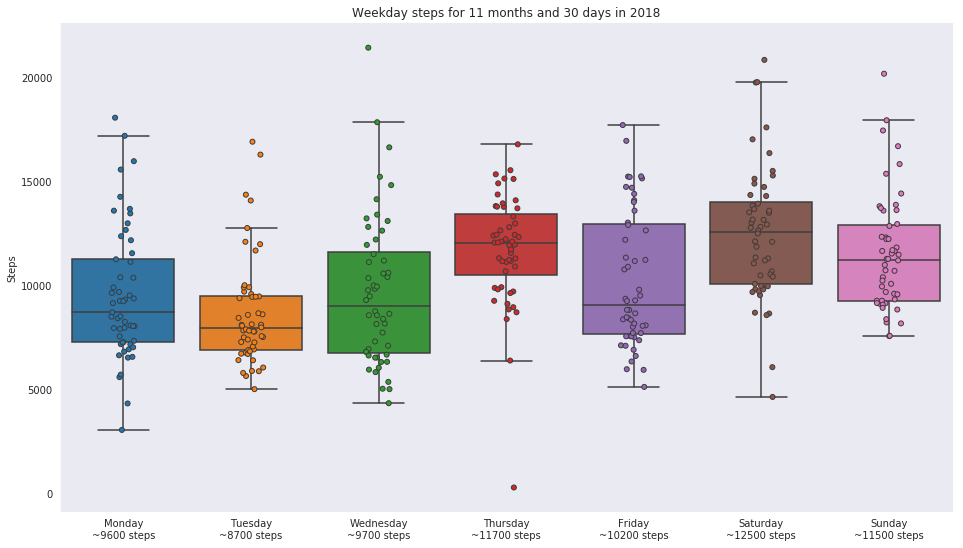

In [17]:
# Plot the steps per weekday
seaborn.boxplot(data=data[data.Year == yearwelookat],
                x='Weekday',
                y='Steps',
                fliersize=0)
seaborn.stripplot(data=data[data.Year == yearwelookat],
                  x='Weekday',
                  y='Steps',
                  jitter=True,
                  linewidth=1)
plt.gca().set_xticklabels(Ticklabels_weekday)
plt.title('Weekday steps for %s months and %s days in %s' % (Duration.months,
                                                             Duration.days,
                                                             yearwelookat))
plt.gca().xaxis.label.set_visible(False)
seaborn.despine()
plt.show()

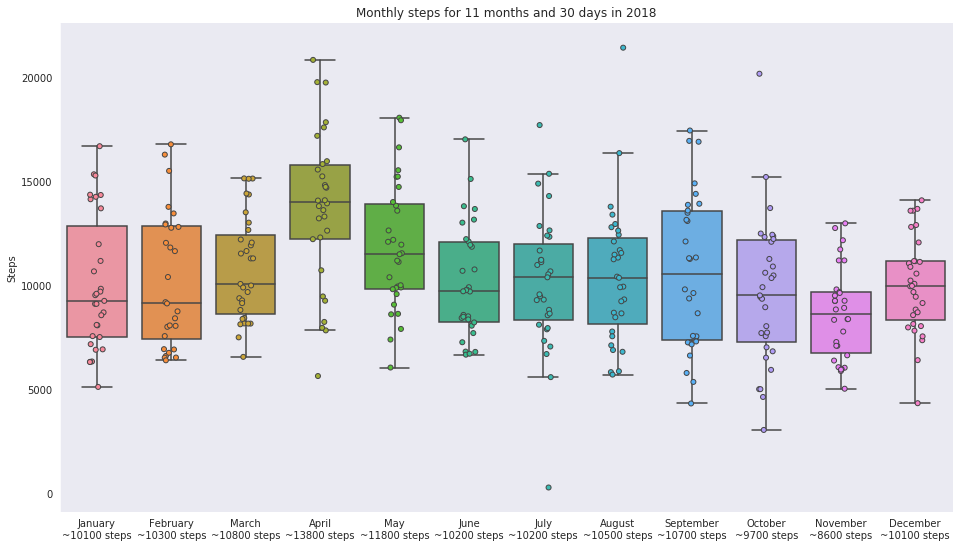

In [18]:
# Plot the steps per month
seaborn.boxplot(data=data[data.Year == yearwelookat],
                x='Month',
                y='Steps',
                fliersize=0)
seaborn.stripplot(data=data[data.Year == yearwelookat],
                  x='Month',
                  y='Steps',
                  jitter=True,
                  linewidth=1)
plt.gca().set_xticklabels(Ticklabels_month)
plt.title('Monthly steps for %s months and %s days in %s' % (Duration.months,
                                                             Duration.days,
                                                             yearwelookat))
plt.gca().xaxis.label.set_visible(False)
seaborn.despine()
plt.show()